<a href="https://colab.research.google.com/github/dhsong95/dacon-emnist-competition/blob/master/notebooks/EMNIST_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
%ls /content/gdrive/'My Drive'/'Google Colaboratory'/dacon-emnist-competition/

data/  LICENSE  notebooks/  README.md


In [10]:
%cd /content/gdrive/'My Drive'/'Google Colaboratory'/dacon-emnist-competition/

/content/gdrive/My Drive/Google Colaboratory/dacon-emnist-competition


In [12]:
import os
import pandas as pd

In [15]:
datadir = 'data/'

train = pd.read_csv(os.path.join(datadir, 'train.csv'))
test = pd.read_csv(os.path.join(datadir, 'test.csv'))
submission = pd.read_csv(os.path.join(datadir, 'submission.csv'))

In [17]:
train.sample(10)

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
262,263,7,Y,2,4,1,2,0,3,2,0,1,4,1,1,4,3,1,3,3,2,2,2,1,4,3,4,2,2,1,0,0,3,4,1,1,1,3,3,2,...,4,0,4,0,4,4,4,1,4,3,2,4,3,3,0,1,1,1,0,2,0,3,1,2,0,1,1,2,1,4,1,1,4,4,1,4,0,1,0,3
1640,1641,7,R,1,0,4,1,2,0,3,4,4,3,3,2,4,2,1,4,1,4,2,2,0,4,0,4,1,3,0,4,0,2,3,4,0,2,1,4,2,...,1,2,0,4,1,0,0,0,1,1,4,0,1,4,1,3,2,2,2,4,3,4,1,4,4,2,2,4,4,0,1,3,1,1,0,1,3,0,1,4
17,18,7,A,2,3,0,4,0,0,1,3,2,4,4,4,3,3,4,4,0,3,4,1,3,0,0,1,0,4,3,3,0,3,4,0,1,4,4,2,2,...,3,1,4,3,0,0,4,2,0,3,4,3,0,3,4,1,0,1,4,4,4,0,4,4,1,0,1,1,4,4,1,2,0,0,1,0,2,2,1,4
815,816,6,D,1,1,4,3,1,2,2,2,2,4,3,2,3,1,2,2,0,0,4,1,2,3,4,4,0,4,4,1,1,4,2,4,4,0,3,1,4,...,2,4,1,3,1,4,2,1,3,1,1,2,2,0,4,3,4,1,1,2,1,4,0,3,3,1,4,4,3,3,0,1,2,4,2,2,2,3,1,2
2027,2028,9,U,4,3,2,0,1,2,4,0,4,0,0,1,2,4,0,4,2,1,0,4,3,3,4,3,3,1,0,2,2,2,2,1,3,3,3,2,0,...,1,3,2,1,2,2,3,4,4,2,4,2,3,0,0,0,0,0,3,3,2,3,3,3,2,1,3,2,2,1,0,0,3,3,0,2,1,0,0,2
1420,1421,2,T,4,3,4,4,1,2,0,0,3,1,1,0,0,0,2,3,1,0,1,0,0,0,4,0,3,2,4,2,1,1,0,0,1,2,0,1,2,...,2,3,3,4,4,1,2,3,1,2,1,3,3,1,0,0,3,4,0,4,1,3,1,0,0,4,2,3,4,3,3,2,3,3,1,1,3,3,2,0
1205,1206,3,I,4,2,0,4,2,0,2,1,2,4,3,2,1,3,0,3,0,3,0,0,4,3,1,1,0,3,2,4,0,0,3,0,1,0,1,1,1,...,2,3,1,0,2,2,4,4,3,1,2,4,4,3,0,3,0,3,2,3,3,4,4,0,2,2,4,0,4,2,3,4,2,2,2,4,3,3,2,3
1843,1844,5,G,2,4,3,1,4,4,0,2,2,2,4,0,1,2,3,3,2,3,3,1,0,1,1,2,1,3,1,4,3,0,0,2,3,4,0,1,0,...,5,6,2,5,0,3,0,3,2,2,3,1,0,3,1,0,0,0,4,0,0,4,4,3,0,0,2,0,3,4,2,3,3,4,2,0,4,1,1,4
945,946,5,U,0,0,1,4,4,1,1,2,3,3,1,4,3,3,4,1,4,2,2,2,0,3,3,1,0,3,0,1,1,3,1,2,4,3,3,3,4,...,1,0,3,0,1,3,2,4,4,1,0,4,2,3,0,2,1,0,0,2,3,4,4,1,4,3,1,4,3,0,3,2,1,2,0,2,4,4,1,2
789,790,3,G,2,3,4,2,2,1,2,0,0,0,1,1,3,1,1,4,4,2,3,4,4,3,4,2,4,4,3,2,3,2,2,2,2,2,0,2,4,...,0,0,1,1,3,3,2,0,0,0,4,0,1,2,1,1,0,4,1,0,3,2,3,4,3,0,2,3,1,0,4,3,1,1,2,1,0,1,2,3


In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
digit_columns = train.columns[3:]
digits = np.array(train.loc[:, digit_columns])
digits.shape

(2048, 784)

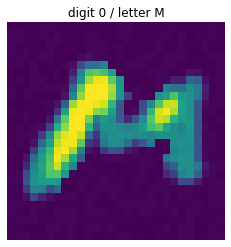

In [54]:
index = np.random.randint(digits.shape[0])
plt.figure(figsize=(4, 4))
plt.imshow(digits[index, :].reshape(28, 28))
plt.title(f'digit {train.loc[index, "digit"]} / letter {train.loc[index, "letter"]}')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [58]:
x_train = train.drop(columns=['id', 'digit', 'letter']).values.reshape(-1, 28, 28, 1)
x_train = x_train / 255.0
x_train.shape

(2048, 28, 28, 1)

In [66]:
N = len(train['digit'])
C = len(pd.unique(train['digit']))

y_train = np.zeros(shape=(N, C))
for idx, digit in enumerate(train['digit']):
    y_train[idx, digit] = 1
y_train.shape

(2048, 10)

In [104]:
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [124]:
class BasicCNN:
    def __init__(self, image_shape):
        self.model = self.build_model(image_shape)
        adam = Adam(learning_rate=1e-3)
        self.model.compile(
            loss='categorical_crossentropy',
            optimizer=adam,
            metrics=['accuracy']
        )

    def build_model(self, image_shape):
        model = keras.models.Sequential()

        model.add(Conv2D(128, 3, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D())
        model.add(Dropout(rate=0.5))

        model.add(Conv2D(256, 3, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D())
        model.add(Dropout(rate=0.5))

        model.add(Conv2D(512, 3, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D())
        model.add(Dropout(rate=0.5))

        model.add(Flatten())

        model.add(Dense(512, activation='relu'))
        model.add(BatchNormalization())

        model.add(Dense(10, activation='softmax'))


        inputs = keras.Input(image_shape[1:])
        outputs = model(inputs)

        return keras.Model(inputs, outputs)

    def train(self, x_train, y_train, epochs, batch_size):
        self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    def predict(self, x_test):
        return self.model.predict(x_test)

In [125]:
basic_cnn = BasicCNN(x_train.shape)
basic_cnn.train(x_train, y_train, 100, 100)

Epoch 1/100
17/17 [==============================] - 0s 26ms/step - loss: 2.5688 - accuracy: 0.2338 - val_loss: 3.2458 - val_accuracy: 0.1073
Epoch 2/100
17/17 [==============================] - 0s 15ms/step - loss: 2.0546 - accuracy: 0.3504 - val_loss: 6.2038 - val_accuracy: 0.1073
Epoch 3/100
17/17 [==============================] - 0s 15ms/step - loss: 1.7454 - accuracy: 0.4219 - val_loss: 8.9787 - val_accuracy: 0.1073
Epoch 4/100
17/17 [==============================] - 0s 16ms/step - loss: 1.5326 - accuracy: 0.4945 - val_loss: 12.1872 - val_accuracy: 0.1073
Epoch 5/100
17/17 [==============================] - 0s 15ms/step - loss: 1.3424 - accuracy: 0.5531 - val_loss: 16.0927 - val_accuracy: 0.1073
Epoch 6/100
17/17 [==============================] - 0s 15ms/step - loss: 1.2010 - accuracy: 0.5910 - val_loss: 20.2117 - val_accuracy: 0.1073
Epoch 7/100
17/17 [==============================] - 0s 15ms/step - loss: 1.0589 - accuracy: 0.6386 - val_loss: 23.8966 - val_accuracy: 0.1073
Ep

In [127]:
x_test = np.array(test.loc[:, digit_columns].values)
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test / 255.0
x_test.shape

(20480, 28, 28, 1)

In [156]:
prediction = basic_cnn.predict(x_test)

In [157]:
prediction = np.argmax(prediction, axis=-1)

In [158]:
submission.head()

,id,digit
0,2049,1
1,2050,1
2,2051,1
3,2052,1
4,2053,1


In [159]:
test.head()

,id,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,0,0,1,0,1,3,4,4,0,0,2,4,4,1,3,3,2,2,4,1,0,1,2,2,1,2,2,1,4,0,...,1,3,1,1,3,3,4,1,3,1,2,4,1,2,0,3,1,2,4,0,2,1,2,4,1,1,3,2,1,0,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,2,1,0,3,0,1,1,4,1,2,0,2,2,0,4,3,4,0,2,4,4,2,1,2,4,0,4,2,0,2,...,3,4,2,6,2,2,0,1,2,4,1,1,3,3,2,3,4,2,2,4,3,1,3,3,3,1,3,4,4,2,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,2,1,2,0,1,0,3,0,1,4,3,0,0,3,0,4,1,0,3,2,0,4,1,2,0,0,1,3,0,2,...,0,4,4,3,4,1,4,2,3,4,1,2,0,2,2,3,3,1,1,4,1,2,4,0,0,0,0,2,3,2,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,0,2,3,2,3,4,4,4,0,1,4,2,2,0,1,4,3,1,3,0,2,3,2,4,3,1,1,4,0,0,...,0,4,1,1,2,3,2,3,3,0,0,1,3,3,0,2,0,0,2,3,2,2,3,1,1,2,4,0,1,2,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,1,1,4,3,4,1,2,1,4,3,3,4,0,4,4,2,0,0,0,0,3,4,0,1,4,2,2,2,1,4,...,4,1,3,2,1,2,1,4,4,1,2,3,2,4,2,1,4,3,4,3,0,1,0,1,1,2,1,1,0,2,4,3,1,4,0,2,1,2,3,4


In [160]:
submission['digit'] = prediction
submission.head(10)

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3
5,2054,7
6,2055,5
7,2056,3
8,2057,4
9,2058,4


In [166]:
submission.to_csv('data/submission_1.csv', index=False)